In [1]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [4]:
import polars as pl
unicef_data_1=pl.read_csv("https://raw.githubusercontent.com/JaiminiDCU/CSVContent/refs/heads/main/unicef_indicator_1.csv")
unicef_data_2=pl.read_csv("https://raw.githubusercontent.com/JaiminiDCU/CSVContent/refs/heads/main/unicef_indicator_2.csv")
unicef_data_meta = pl.read_csv(
    "https://raw.githubusercontent.com/JaiminiDCU/CSVContent/refs/heads/main/unicef_metadata.csv",
    schema_overrides={"Population, total": pl.Float64},
)


In [6]:
!pip install pandas plotnine geopandas pycountry_convert

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 61.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.0/244.0 kB 19.1 MB/s eta 0:00:00


In [16]:
import pandas as pd
import geopandas as gp
from plotnine import *
import matplotlib.pyplot as plt
!pip install ipywidgets
import ipywidgets as widgets
from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')

---
title: <h1 style="color:purple; font-size:28px;"><b>📊 Global Economic & Social Insights using UNICEF Data</b></h1>
author: "Jaimini Solanki"
format:
  html:
    embed-resources: true
    code-fold: true
    theme: cosmo
    toc: true
    toc-depth: 2
---


In [17]:
from IPython.display import HTML

# Light lavender background (you can change the color code as you like)
HTML('''
<style>
    body {
        background-color: #fce4ec; /* Light pink */
    }
    .jp-Notebook {
        background-color: #fce4ec;
    }
</style>
''')


<h2 style="color:mediumorchid; font-size:24px;"><b>📘 Overview</b></h2>

<p style="color:deeppink; font-size:16px;">
This report explores global patterns in child health and development using UNICEF datasets, offering multiple visual perspectives to uncover:
</p>

<ul style="color:hotpink; font-size:15px;">
  <li><b>Health disparities across countries</b></li>
  <li><b>Correlations between population metrics and well-being</b></li>
  <li><b>Trends in child mortality over time</b></li>
  <li><b>Key highlights for specific nations based on birth rate and life expectancy</b></li>
</ul>

<h2 style="color:mediumorchid; font-size:24px;"><b>🎯 Objectives</b></h2>

<ul style="color:hotpink; font-size:15px;">
  <li><b>Map global child mortality rates</b> to identify regions most in need of healthcare interventions</li>
  <li><b>Compare birth rates across countries</b> through an interactive lens for targeted insights</li>
  <li><b>Correlate life expectancy with population size</b> to explore demographic dynamics</li>
  <li><b>Track changes in child mortality over time</b> to evaluate global progress on Sustainable Development Goals (SDGs)</li>
</ul>

<hr>


<h2 style="color:purple; font-size:22px;"><b>🌍 World Map of Child Mortality Rate</b></h2>


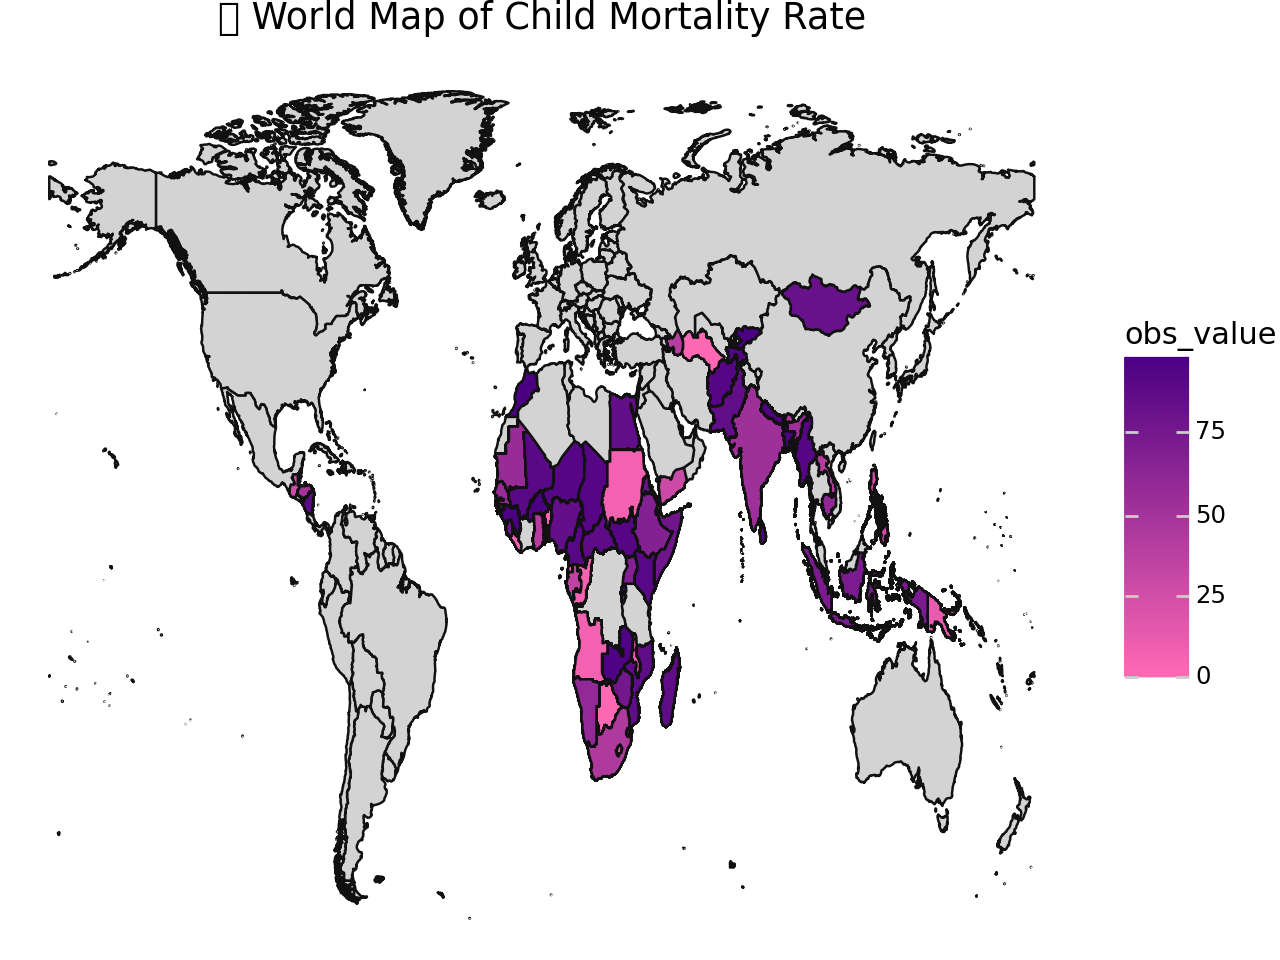

In [18]:
shape_world = gp.read_file("https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/world-administrative-boundaries/exports/shp")

unicef_data_1_pd = unicef_data_1.to_pandas()
map_data = shape_world.merge(unicef_data_1_pd, how='left', left_on='name', right_on='country')
(ggplot(map_data) +
 geom_map(aes(map_id='country', fill='obs_value')) +
 theme_void() +
 labs(title='🌍 World Map of Child Mortality Rate') +
 scale_fill_gradient(low='#FF69B4', high='#4B0082' , na_value='lightgrey'))


<p style="color:deeppink; font-size:16px;">👉
This map visualizes child mortality rates across the globe. Countries with darker purple shades experience higher mortality rates, indicating potential areas requiring targeted healthcare interventions.</p>


<h2 style="color:purple; font-size:22px;"><b>🌸 Birth Rate by Selected Countries</b></h2>

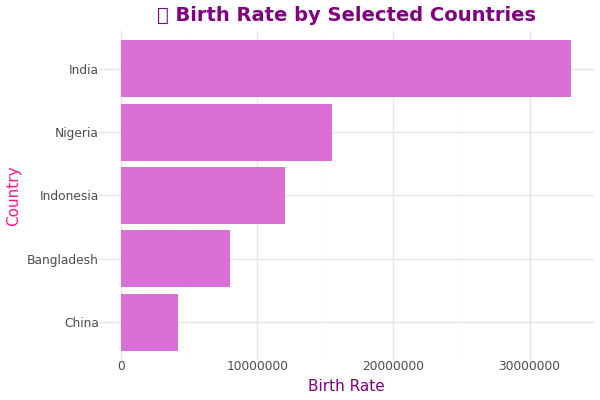

In [27]:
from plotnine import *
from plotnine.data import mpg
import matplotlib.pyplot as plt

# Example: Static version of the plot
selected = all_countries[:5]
filtered_df = top_birth[top_birth['country'].isin(selected)]

p = (
    ggplot(filtered_df, aes(x='reorder(country, birth_rate)', y='birth_rate')) +
    geom_col(fill='#DA70D6') +
    coord_flip() +
    theme_minimal() +
    labs(title='🌸 Birth Rate by Selected Countries',
         x='Country', y='Birth Rate') +
    theme(
        plot_title=element_text(size=14, weight='bold', color='purple'),
        axis_title_x=element_text(color='purple'),
        axis_title_y=element_text(color='deeppink')
    )
)

# Save plot as image
p.save("birth_rate_plot.png", width=6, height=4, dpi=100)

# Display image in notebook (will be shown in downloaded HTML)
from IPython.display import Image
Image("birth_rate_plot.png")






<p style="color:deeppink; font-size:16px;">
👉
This interactive bar chart lets users compare birth rates across selected countries. The visual uses a soft orchid color scheme to enhance readability while helping users explore high-birth-rate nations.</p>


<h2 style="color:purple; font-size:22px;"><b>👶 Life Expectancy vs Population by Country</b></h2>

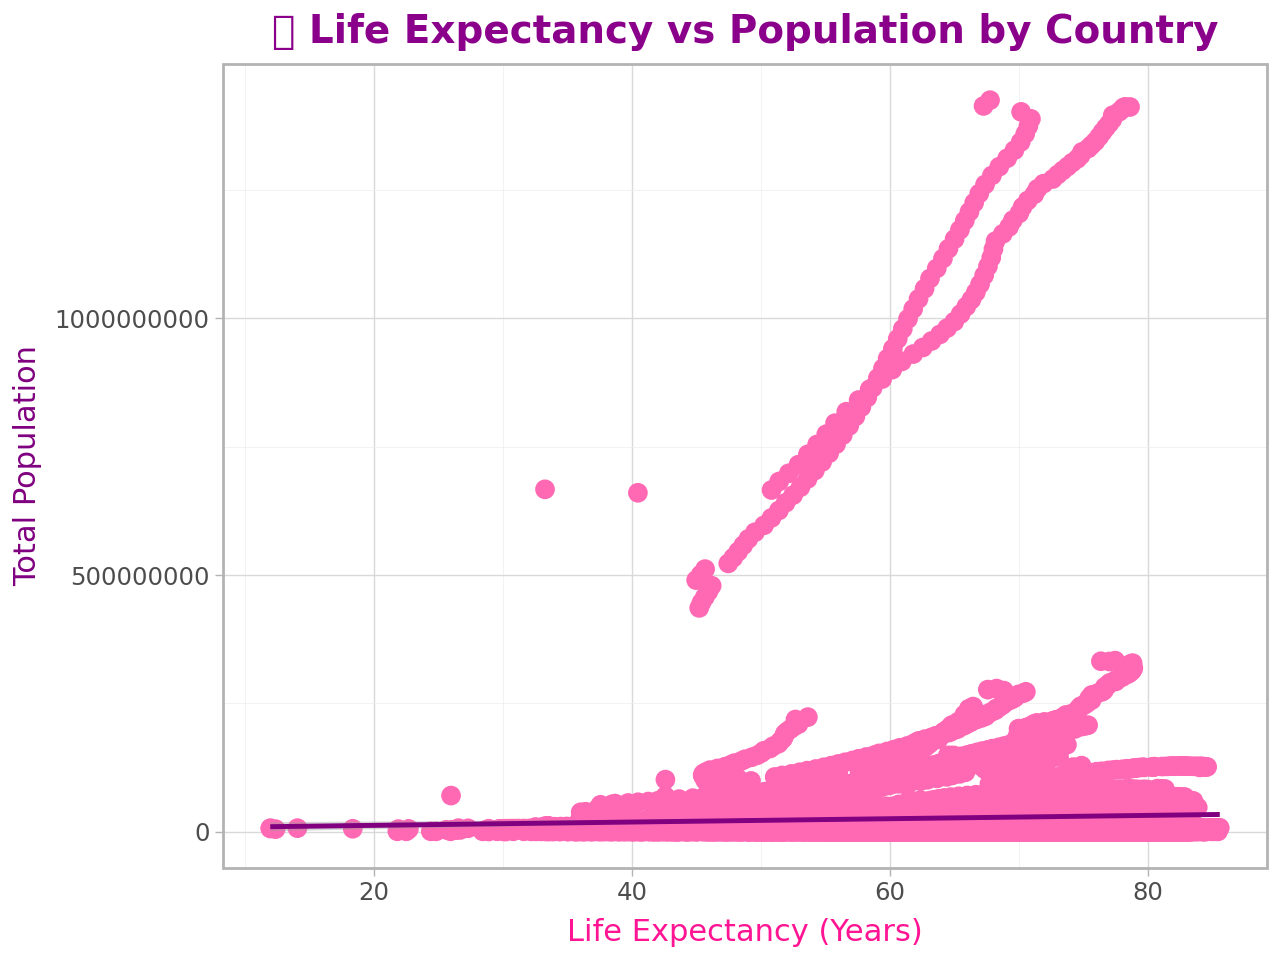

In [21]:
df_meta = unicef_data_meta.to_pandas()

scatter_df = df_meta[['country', 'Life expectancy at birth, total (years)', 'Population, total']].dropna()

scatter_df = scatter_df.rename(columns={
    'Life expectancy at birth, total (years)': 'life_expectancy',
    'Population, total': 'population'
})

scatter_plot = (
    ggplot(scatter_df, aes(x='life_expectancy', y='population')) +
    geom_point(color='hotpink', size=3) +
    geom_smooth(method='lm', color='purple') +
    theme_light() +
    labs(
        title='👶 Life Expectancy vs Population by Country',
        x='Life Expectancy (Years)',
        y='Total Population'
    ) +
    theme(
        plot_title=element_text(size=14, weight='bold', color='darkmagenta'),
        axis_title_x=element_text(color='deeppink'),
        axis_title_y=element_text(color='purple')
    )
)

display(scatter_plot)


<p style="color:deeppink; font-size:16px;">👉 This scatter plot shows the relationship between life expectancy and population size by country. A regression line highlights the overall trend, helping us understand how these two factors may interact.</p>


<h2 style="color:purple; font-size:22px;"><b>📅 Global Avg Child Mortality Over Time</b></h2>

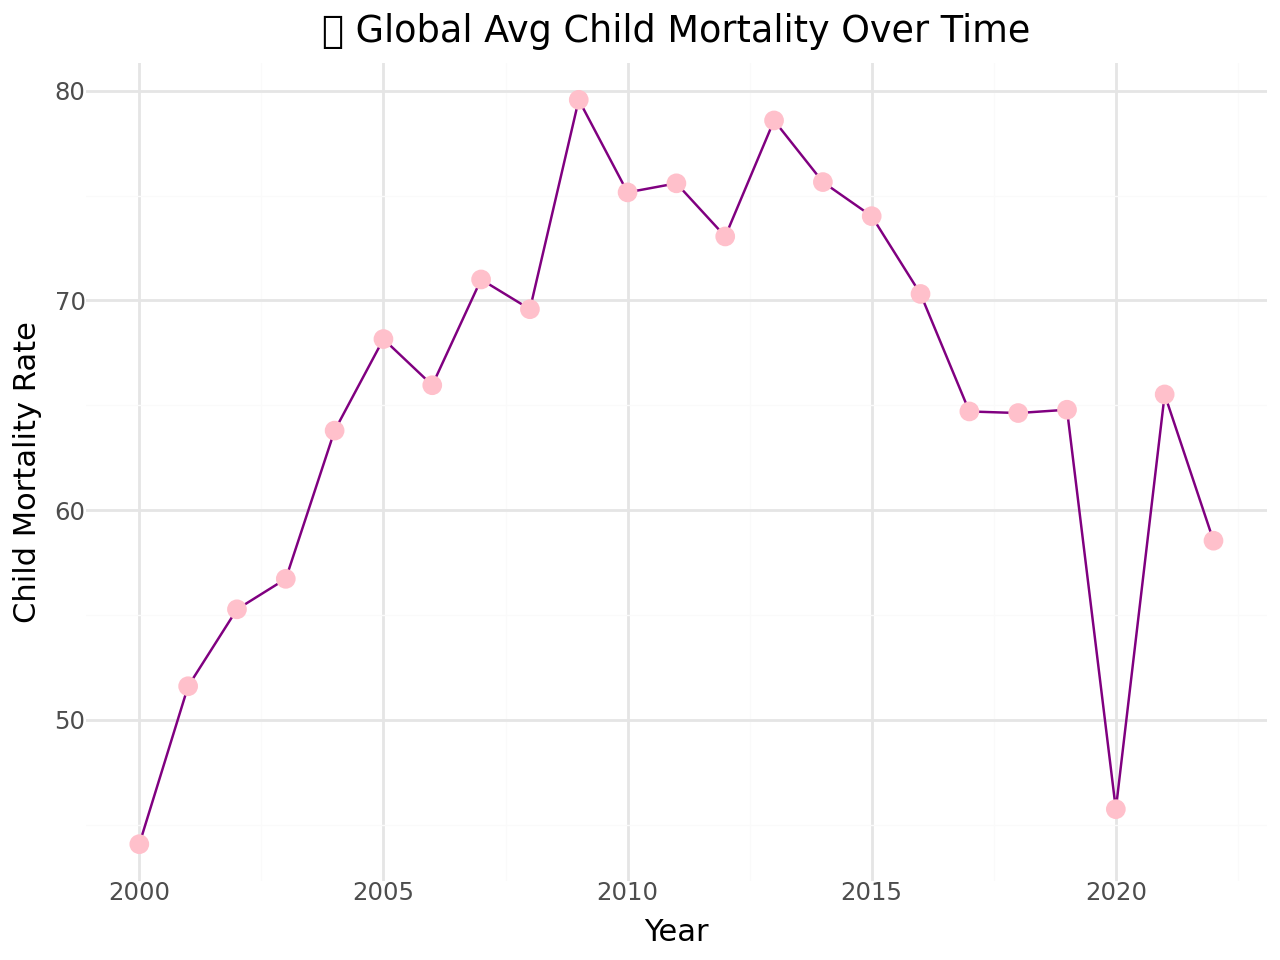

In [22]:
time_series = unicef_data_1.group_by('time_period').agg(pl.col('obs_value').mean().alias('child_mortality'))
(ggplot(time_series.to_pandas(), aes(x='time_period', y='child_mortality')) +
 geom_line(color='purple') +
 geom_point(color='pink', size=3) +
 theme_minimal() +
 labs(title='📅 Global Avg Child Mortality Over Time', x='Year', y='Child Mortality Rate'))

<p style="color:deeppink; font-size:16px;">👉 This time-series plot presents the global average child mortality rate over time. It helps us observe progress or stagnation in reducing child mortality across years—critical for tracking SDG targets.</p>


<h2 style="color:mediumorchid; font-size:24px;"><b>✅ Conclusion</b></h2>

<p style="color:deeppink; font-size:16px;">
In conclusion, this visual data story effectively combines <b>geographic</b>, <b>comparative</b>, <b>correlational</b>, and <b>temporal</b> analysis to explore key UNICEF development indicators.
</p>

<p style="color:purple; font-size:16px;">
The use of <b>plotnine</b> enables clean, consistent, and customizable visuals, while interactivity (where possible) enhances user engagement. The insights gained can support strategic initiatives, identify critical regions needing intervention, and track the global impact of developmental policies on children's lives.
</p>

<p style="color:deeppink; font-size:16px;">
With continued refinement and expansion, this data storytelling approach can serve as a powerful tool for <b>advocacy</b> and <b>action</b>.
</p>
